In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression

In [2]:
startup_data = pd.read_csv("training_set_label.csv")
startup_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [3]:
startup_data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [4]:
test_data = pd.read_csv('testing_set_label.csv')
test_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-2007,...,0,c:14666,0,1,1,1,0,0,1.3333,1
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-2000,...,1,c:31546,0,0,0,0,0,1,6.0000,1
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-2004,...,0,c:46259,0,0,0,1,1,0,2.0000,0
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-2005,...,1,c:139,0,0,1,0,0,0,1.0000,0
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-1997,...,0,c:25449,0,0,0,0,1,1,5.5000,1


In [5]:
startup_data.isnull().sum()

Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
is_CA                         0
is_NY                         0
is_MA                         0
is_TX                         0
is_otherstate                 0
category_code                 0
is_software                   0
is_web                        0
is_mobile                     0
is_enter

In [6]:
startup_data.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,...,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,...,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,...,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


In [7]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [8]:
startup_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
918    False
919    False
920    False
921    False
922    False
Length: 923, dtype: bool

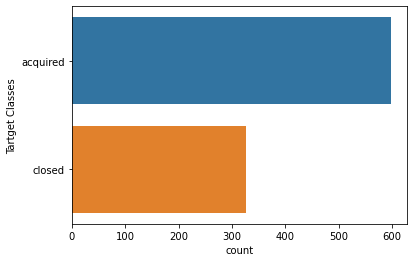

In [9]:
sns.countplot(y=startup_data['status'], data=startup_data)
plt.xlabel('count')
plt.ylabel('Tartget Classes')
plt.show()

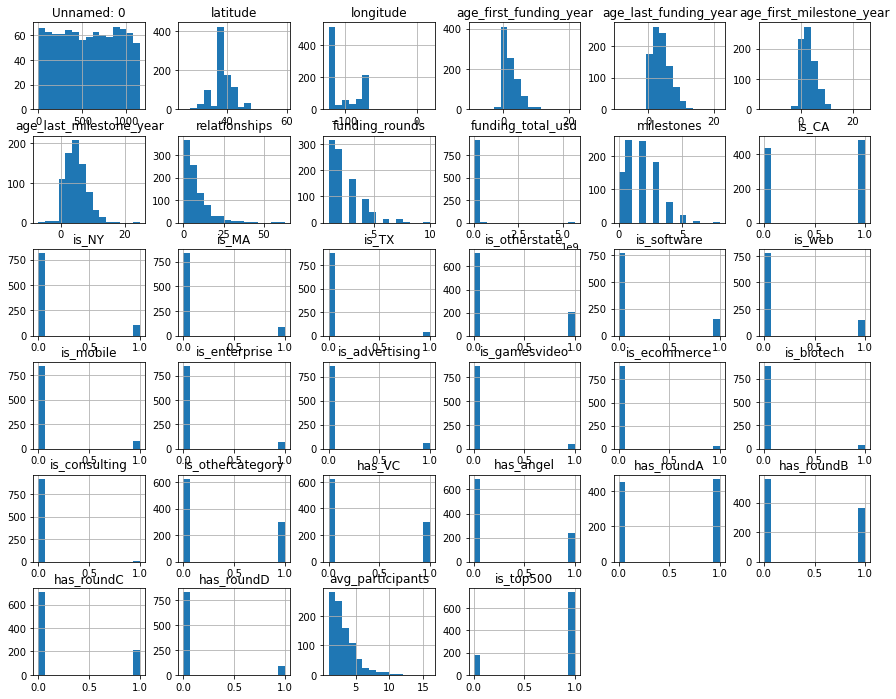

In [10]:
startup_data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

 Model Buildng



In [11]:
#features=['id','name','relationships','funding_rounds','funding_total_usd','milestone','is_CA','is_NY','is_MA','is_TX','is_otherstate']
X=startup_data.drop(['name','state_code','latitude','longitude','zip_code','id','city','Unnamed: 6','founded_at','closed_at','age_first_milestone_year','age_last_milestone_year','state_code.1',
                     'object_id','first_funding_at','last_funding_at','category_code','status'],axis=1)
X.head()

,Unnamed: 0,age_first_funding_year,age_last_funding_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,2.2493,3.0027,3,3,375000,3,1,0,0,...,0,1,0,1,0,0,0,0,1.0000,0
1,204,5.1260,9.9973,9,4,40100000,1,1,0,0,...,0,0,1,0,0,1,1,1,4.7500,1
2,1001,1.0329,1.0329,5,1,2600000,2,1,0,0,...,0,0,0,0,1,0,0,0,4.0000,1
3,738,3.1315,5.3151,5,3,40000000,1,1,0,0,...,0,0,0,0,0,1,1,1,3.3333,1
4,1002,0.0000,1.6685,2,2,1300000,1,1,0,0,...,0,0,1,1,0,0,0,0,1.0000,1


In [12]:
import math
def conv(status_string):
    if isinstance(status_string, float) and math.isnan(status_string):
        return status_string
    return int(status_string == "acquired")
startup_data["status_bin"] = startup_data["status"].apply(conv)
startup_data["status_bin"].value_counts(dropna=False)


1    597
0    326
Name: status_bin, dtype: int64

In [13]:
y=startup_data['status_bin']
y.head()

0    1
1    1
2    1
3    1
4    0
Name: status_bin, dtype: int64

In [58]:
#Train test split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3,random_state=1)
y_val.value_counts()

1    174
0    103
Name: status_bin, dtype: int64

In [41]:
clf = RandomForestClassifier(n_estimators=100, max_depth= 5, random_state=1)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)


In [42]:
metrics.mean_squared_error(y_val, y_pred)

0.2490974729241877

In [43]:
confusion_matrix(y_val, y_pred)

array([[ 45,  58],
       [ 11, 163]], dtype=int64)

In [44]:
accuracy_score(y_val,y_pred)

0.7509025270758123

In [45]:
print("\n Classification Report : \n",classification_report(y_val, y_pred))


 Classification Report : 
               precision    recall  f1-score   support

           0       0.80      0.44      0.57       103
           1       0.74      0.94      0.83       174

    accuracy                           0.75       277
   macro avg       0.77      0.69      0.70       277
weighted avg       0.76      0.75      0.73       277



In [59]:
rfclassifier = RandomForestClassifier()
param_grid = { 'max_depth'   : [10,20,40],
               'n_estimators' : [100,200,300]
             }  
  
grid = GridSearchCV(rfclassifier, param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.792, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.760, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.798, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.791, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.853, total=   0.5s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.800, total=   0.7s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.775, total=   0.5s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.783, total=   0.5s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.814, total=   0.5s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   27.3s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [61]:
#best parameters after tuning
print(grid.best_params_) 
print(grid.best_estimator_)  


{'max_depth': 10, 'n_estimators': 200}
RandomForestClassifier(max_depth=10, n_estimators=200)


In [66]:

grid_pred=grid.predict(X_val)


In [67]:
print("Confusion Matrix : \n ",confusion_matrix(y_val, grid_pred))
print("\n Accuracy Score : \n ",accuracy_score(y_val, grid_pred))
print("\n Classification Report : \n",classification_report(y_val, grid_pred))

Confusion Matrix : 
  [[ 50  53]
 [ 16 158]]

 Accuracy Score : 
  0.7509025270758123

 Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.49      0.59       103
           1       0.75      0.91      0.82       174

    accuracy                           0.75       277
   macro avg       0.75      0.70      0.71       277
weighted avg       0.75      0.75      0.74       277



In [69]:
test_data = pd.read_csv('testing_set_label.csv')
test_data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,127,CT,41.321520,-72.929423,6511,c:14666,New Haven,NaN,REMOTV,02-10-2007,...,0,c:14666,0,1,1,1,0,0,1.3333,1
1,556,CA,37.452084,-122.112879,94303,c:31546,Palo Alto,NaN,Satiety,01-01-2000,...,1,c:31546,0,0,0,0,0,1,6.0000,1
2,812,NJ,40.296222,-74.050972,7724,c:46259,Eatontown,Eatontown NJ 7724,CebaTech,01-01-2004,...,0,c:46259,0,0,0,1,1,0,2.0000,0
3,106,CA,37.789268,-122.395184,94105,c:139,San Francisco,NaN,Swivel,12-01-2005,...,1,c:139,0,0,1,0,0,0,1.0000,0
4,434,CA,33.133240,-117.275027,92011,c:25449,Carlsbad,NaN,PhotoThera,05-01-1997,...,0,c:25449,0,0,0,0,1,1,5.5000,1


In [70]:
test_data.shape

(231, 47)

In [74]:

X_test=test_data.drop(['name','state_code','latitude','longitude','zip_code','id','city','Unnamed: 6','founded_at','closed_at','age_first_milestone_year','age_last_milestone_year','state_code.1',
                     'object_id','first_funding_at','last_funding_at','category_code'],axis=1)


In [75]:
rfclassifier = RandomForestClassifier()
param_grid = { 'max_depth'   : [10,20,40],
               'n_estimators' : [100,200,300]
             }  
  
grid = GridSearchCV(rfclassifier, param_grid, refit = True, verbose = 3) 
  
grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...... max_depth=10, n_estimators=100, score=0.800, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.767, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] ...... max_depth=10, n_estimators=100, score=0.767, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.760, total=   0.3s
[CV] max_depth=10, n_estimators=100 ..................................
[CV] ...... max_depth=10, n_estimators=100, score=0.829, total=   0.3s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.808, total=   0.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.760, total=   0.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.775, total=   0.8s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] ...... max_depth=10, n_estimators=200, score=0.798, total=   0.6s
[CV] max_depth=10, n_estimators=200 ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   26.2s finished


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 40],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [77]:
grid_y_pred=grid.predict(X_test)

In [82]:
grid_y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [91]:
grid_y_predict=pd.DataFrame(grid_y_pred,index=None)
grid_y_predict.to_string(index=False)
#yp.rename(columns={"0":"Predicted_Y"})
hder=['status']
y_pred=grid_y_predict.to_csv("Submission.csv",header=hder, index=False)
y_pred=pd.read_csv("Submission.csv")
y_pred.head()

,status
0,1
1,1
2,1
3,1
4,0


In [90]:
y_pred.replace(to_replace ="1",
                 value ="acquired")
y_pred.head()

,status
0,acquired
1,acquired
2,acquired
3,acquired
4,closed


In [130]:
data=startup_data['category_code'].value_counts()
data_top=data.head(10)

<function matplotlib.pyplot.show(close=None, block=None)>

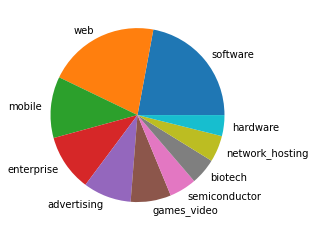

In [132]:
data_top.plot.pie(label="")
plt.show